## 타이타닉호 생존 예측
- 타이타닉 호의 생존자를 예측해보자
- 전통적인 문제이기 때문에 통계 검정 사용 x
- baseline 모델 비교(기본값의 성능이 가장 좋았던 모델에 optuna를 적용)

In [34]:
import pandas as pd

In [35]:
gender_df = pd.read_csv('gender_submission.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [36]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Survived 생존(0 : 사망, 1: 생존)
- Pclass : 항공권 클래스
- name : 이름
- sex : 성별
- Age : 연령
- SibSp : 타이타닉에 승선한 형제자매/배우자
- Parch : 타이타닉호에 탑승한 부모/자녀
- ticket : 항공권 번호
- Fare : 여객 운임
- Cabin : 객실 번호
- Embarked : 승선항

In [37]:
train_df['Age'].median()

28.0

In [38]:
train_df.shape ## 891개의 데이터, 12개 컬럼

(891, 12)

In [39]:
train_df.isna().sum() # 결측치 확인

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


> Age 컬럼의 데이터의 결측치가 전체 값의 20% 이므로 중앙값으로 채우기

<Axes: xlabel='Survived', ylabel='count'>

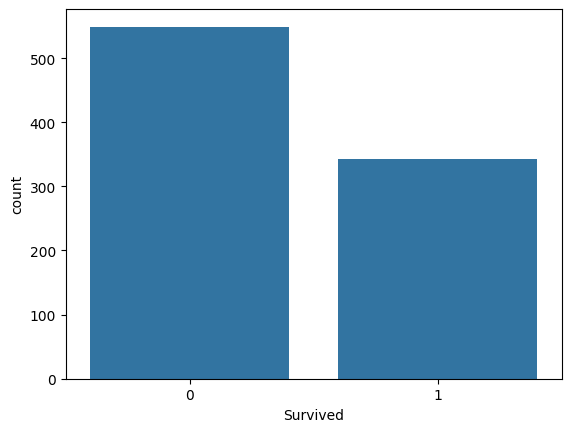

In [40]:
import seaborn as sns
sns.countplot(x='Survived', data = train_df)

In [41]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

In [42]:
train_df = train_df.drop('Cabin',axis=1)
test_df = test_df.drop('Cabin',axis=1)

In [43]:
test_df.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Embarked,0


In [44]:
train_df['Embarked'].value_counts() # embarked 컬럼 값이 몇개씩 있는지

,count
Embarked,
S,644
C,168
Q,77


In [45]:
train_df['Embarked'] = train_df['Embarked'].fillna('S') # embarked 컬럼 결측값 S로 채워 넣기(S의 수가 가장 많음)
test_df['Embarked'] = test_df['Embarked'].fillna('S')

In [46]:
train_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [47]:
# passengerid , name, Ticket 컬럼 제거 입력피쳐에 적절하지 않음
train_df = train_df.drop(['PassengerId','Name','Ticket'],axis=1)
test_df = test_df.drop(['PassengerId','Name','Ticket'],axis=1)

In [48]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [49]:
test_df.dropna()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,27.0,0,0,8.0500,S


In [50]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
train_df = pd.get_dummies(train_df,columns=['Sex','Embarked'],drop_first=True)
test_df = pd.get_dummies(test_df,columns=['Sex','Embarked'],drop_first=True) #drop_first사용(첫번째 컬럼을 삭제해 다중 공선성 피하기 위함)

In [51]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [52]:
X = train_df.drop('Survived',axis=1) # 타겟피쳐 제거 후 특성, 타켓 분리
y = train_df['Survived']

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
#import lightgbm as lgb
from sklearn.metrics import accuracy_score
# 데이터 분할
X_train, X_val, y_train,y_val = train_test_split(X,y, test_size=0.2, random_state=2020158011)

models = {
    'random Forest' : RandomForestClassifier(random_state=2020158011,max_depth=6),
    'Decision Tree' : DecisionTreeClassifier(random_state=2020158011,max_depth=6),
    'Extra Tree' : ExtraTreesClassifier(random_state=2020158011,max_depth=6),
   #'Light GBM' :  lgb.LGBMClassifier(random_state=2020158011)
}
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  print(f'{name} accuracy : {accuracy_score(y_val, y_pred):.4f}')

random Forest accuracy : 0.8212
Decision Tree accuracy : 0.7877
Extra Tree accuracy : 0.8268


In [54]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,True,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,True,True,False
3,3,27.0,0,0,8.6625,True,False,True
4,3,22.0,1,1,12.2875,False,False,True


In [55]:
pred_model = ExtraTreesClassifier(random_state=2020158011, max_depth=6)
pred_model.fit(X,y)

ExtraTreesClassifier(max_depth=6, random_state=2020158011)

In [56]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Sex_male', 'Embarked_Q','Embarked_S']
X_test = test_df[features]
y_test_pred = pred_model.predict(X_test)

In [57]:
test_origin = pd.read_csv('test.csv')

In [58]:
'''
sub = pd.DataFrame({
    'PassengerId' : test_origin['PassengerId'],
    'Survived' : y_test_pred
})
'''

"\nsub = pd.DataFrame({\n    'PassengerId' : test_origin['PassengerId'],\n    'Survived' : y_test_pred\n})\n"

In [59]:
#sub.to_csv('submission.csv', index=False)

내일 할 일
- optuna 개념이해
- 생존자 예측
- 시각화(tableau or BI)

### optuna 이해하고 써보기

In [60]:
!pip install optuna

In [63]:
!pip install create_objective

ERROR: Could not find a version that satisfies the requirement create_objective (from versions: none)
ERROR: No matching distribution found for create_objective


In [64]:
%%writefile objective_function.py
import optuna
from sklearn.model_selection import cross_val_score

def create_objective(model_class, param_ranges, X_train, y_train, cv=5, scoring='accuracy'):
    def objective(trial):
        params = {}
        for param_name, param_config in param_ranges.items():
            if param_config['type'] == 'int':
                params[param_name] = trial.suggest_int(
                    param_name,
                    param_config['low'],
                    param_config['high'],
                    param_config.get('step', 1)
                )
            elif param_config['type'] == 'float':
                params[param_name] = trial.suggest_float(
                    param_name,
                    param_config['low'],
                    param_config['high'],
                    log=param_config.get('log', False)
                )
            elif param_config['type'] == 'categorical':
                params[param_name] = trial.suggest_categorical(
                    param_name,
                    param_config['choices']
                )
        model = model_class(**params)
        score = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)
        return score.mean()
    return objective

Writing objective_function.py


In [61]:
# objective_function.py - 범용 버전

import optuna
from sklearn.model_selection import cross_val_score

def create_objective(model_class, param_ranges, X_train, y_train, cv=5, scoring='accuracy'):
    """
    범용 Optuna objective 함수 생성기

    Parameters:
    -----------
    model_class : 모델 클래스 (예: RandomForestClassifier, XGBClassifier 등)
    param_ranges : 딕셔너리, 각 하이퍼파라미터별 탐색 범위 정의
    X_train : 학습 데이터
    y_train : 학습 타겟
    cv : 교차 검증 폴드 수
    scoring : 평가 지표

    Returns:
    --------
    objective : Optuna objective 함수
    """

    def objective(trial):
        # 파라미터 딕셔너리 생성
        params = {}

        # param_ranges에 정의된 각 하이퍼파라미터에 대해 탐색 범위 설정
        for param_name, param_config in param_ranges.items():
            if param_config['type'] == 'int':
                params[param_name] = trial.suggest_int(
                    param_name,
                    param_config['low'],
                    param_config['high'],
                    param_config.get('step', 1)
                )
            elif param_config['type'] == 'float':
                params[param_name] = trial.suggest_float(
                    param_name,
                    param_config['low'],
                    param_config['high'],
                    log=param_config.get('log', False)
                )
            elif param_config['type'] == 'categorical':
                params[param_name] = trial.suggest_categorical(
                    param_name,
                    param_config['choices']
                )

        # 모델 생성
        model = model_class(**params)

        # 교차 검증으로 성능 평가(cv: k-fold 교차검증 기본값 5)
        score = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)

        # 평균 점수 반환
        return score.mean()

    return objective

### extra trees에 사용

In [65]:
from sklearn.ensemble import ExtraTreesClassifier

# Extra Trees용 하이퍼파라미터 범위 정의
et_param_ranges = {
    'n_estimators': {'type': 'int', 'low': 50, 'high': 100},
    'max_depth': {'type': 'int', 'low': 5, 'high': 30},
    'min_samples_split': {'type': 'int', 'low': 2, 'high': 20},
    'min_samples_leaf': {'type': 'int', 'low': 1, 'high': 10},
    'max_features': {'type': 'categorical', 'choices': ['sqrt', 'log2', None]},
    'bootstrap': {'type': 'categorical', 'choices': [True, False]}
}

# objective 함수 생성
from objective_function import create_objective
et_objective = create_objective(ExtraTreesClassifier, et_param_ranges, X_train, y_train)

# Optuna 최적화 실행
study = optuna.create_study(direction='maximize')
study.optimize(et_objective, n_trials=50)

[I 2025-07-07 03:00:47,436] A new study created in memory with name: no-name-75417966-2547-4c49-bde0-cade39806a2a
/content/objective_function.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  params[param_name] = trial.suggest_int(
[I 2025-07-07 03:00:47,926] Trial 0 finished with value: 0.8020191076529104 and parameters: {'n_estimators': 69, 'max_depth': 13, 'min_samples_split': 14, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.8020191076529104.
/content/objective_function.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments bu

최적의 하이퍼 파라미터
n_estimators : 93       
max_depth : 13
min_samples_split : 6
min_samples_leaf : 2
max_features : log2
bootstrap: False

### XGBoost trees에 *사용*

In [ ]:
from xgboost import XGBClassifier

# XGBoost용 하이퍼파라미터 범위 정의
xgb_param_ranges = {
    'n_estimators': {'type': 'int', 'low': 50, 'high': 500},
    'max_depth': {'type': 'int', 'low': 3, 'high': 10},
    'learning_rate': {'type': 'float', 'low': 0.01, 'high': 0.3, 'log': True},
    'subsample': {'type': 'float', 'low': 0.5, 'high': 1.0},
    'colsample_bytree': {'type': 'float', 'low': 0.5, 'high': 1.0},
    'gamma': {'type': 'float', 'low': 0, 'high': 5}
}

# objective 함수 생성
xgb_objective = create_objective(XGBClassifier, xgb_param_ranges, X_train, y_train)

# Optuna 최적화 실행
study = optuna.create_study(direction='maximize')
study.optimize(xgb_objective, n_trials=50) #초기탐색용도

### 로지스틱 회귀에 사용

In [ ]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀용 하이퍼파라미터 범위 정의
lr_param_ranges = {
    'C': {'type': 'float', 'low': 0.001, 'high': 100, 'log': True},
    'penalty': {'type': 'categorical', 'choices': ['l1', 'l2', 'elasticnet', None]},
    'solver': {'type': 'categorical', 'choices': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
}

# objective 함수 생성
lr_objective = create_objective(LogisticRegression, lr_param_ranges, X_train, y_train)

# Optuna 최적화 실행
study = optuna.create_study(direction='maximize')
study.optimize(lr_objective, n_trials=50)